/Users/usiusi/Documents/Repositories/Craftdroid/craft_custom/venv/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/usiusi/Documents/Repositories/Craftdroid/craft_custom/venv/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


             all        gui    oracles        sys
count  11.000000  11.000000  11.000000  11.000000
mean    7.181818   5.727273   1.454545   0.181818
std     2.272364   1.902152   0.687552   0.404520
min     4.000000   3.000000   1.000000   0.000000
25%     5.000000   4.000000   1.000000   0.000000
50%     7.000000   6.000000   1.000000   0.000000
75%     9.500000   7.000000   2.000000   0.000000
max    10.000000   9.000000   3.000000   1.000000
             all        gui    oracles        sys
count  23.000000  23.000000  23.000000  23.000000
mean    6.695652   4.391304   2.304348   0.130435
std     1.940824   1.529680   0.875670   0.344350
min     4.000000   2.000000   1.000000   0.000000
25%     5.000000   4.000000   2.000000   0.000000
50%     7.000000   4.000000   2.000000   0.000000
75%     8.000000   5.000000   3.000000   0.000000
max    13.000000   9.000000   4.000000   1.000000
             all        gui    oracles        sys
count  30.000000  30.000000  30.000000  30.000000


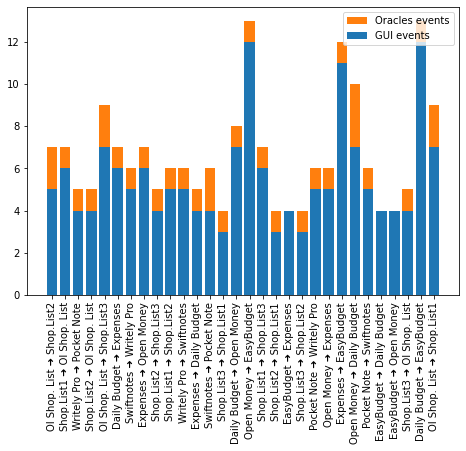

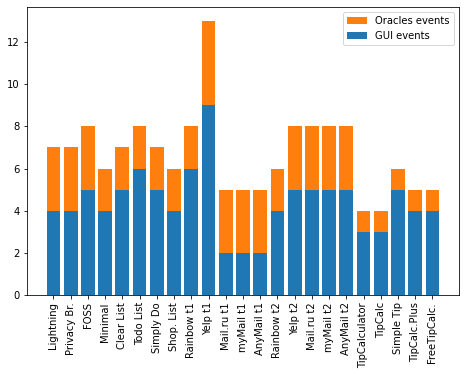

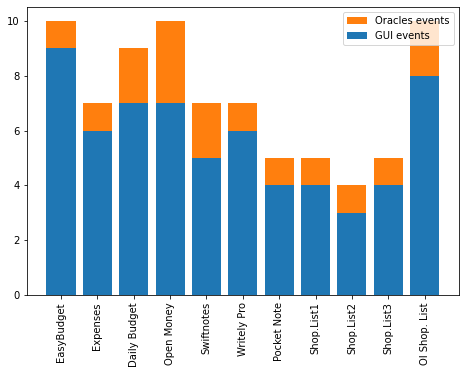

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

subject_names = pd.read_csv('subjects-names.csv')


def change_name(id):
    if '-b' in id:
        id = id[0:id.index('-b')]
    if '-' in id:
        name_parts = id.split('-')
        return change_name(name_parts[0]) + ' ➜ ' + change_name(name_parts[1])
    return subject_names.query(f'id == "{id}"')['name'].values[0]


def make_plot(len_df, save_filename):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(len_df['mig_name'], len_df['oracles'], bottom=len_df['gui'], color='tab:orange', label='Oracles events')
    ax.bar(len_df['mig_name'], len_df['gui'], color='tab:blue', label='GUI events')
    plt.xticks(rotation=90)
    plt.legend(loc=1)
    plt.savefig(save_filename, bbox_inches='tight')


targets_len = pd.read_csv('target_test_len.csv')
targets_len['mig_name'] = targets_len['mig_name'].apply(change_name)
targets_len['gui'] = targets_len['gui'] + targets_len['sys']
targets_len_atm = targets_len[~targets_len['mig_name'].str.contains('a[1-5]')]
make_plot(targets_len_atm, 'target_atm_len.pdf')

src_len = pd.read_csv('src_test_len.csv')

src_len['gui'] = src_len['gui'] + src_len['sys']
src_len_craft = src_len[src_len['mig_name'].str.contains('a[1-5]')]
src_len_atm = src_len[~src_len['mig_name'].str.contains('a[1-5]')]

src_len_craft['mig_name'] = src_len_craft['mig_name'].apply(change_name)
src_len_atm['mig_name'] = src_len_atm['mig_name'].apply(change_name)
make_plot(src_len_craft, 'src_craft_len.pdf')
make_plot(src_len_atm, 'src_atm_len.pdf')
print(src_len_atm.describe())

print(src_len_craft.describe())
print(targets_len_atm.describe())
